C:\Users\Priyadharshni\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Priyadharshni\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


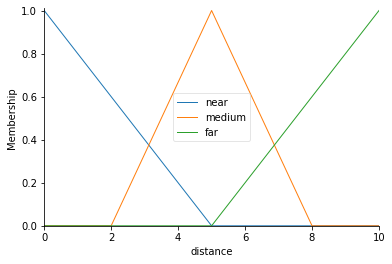

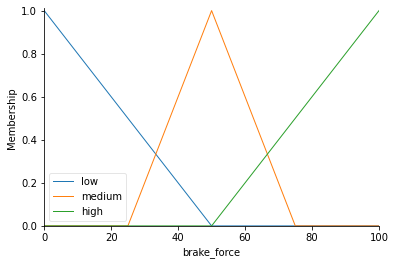

Brake Force: 42.815631262525045


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the antecedents and consequents
distance = ctrl.Antecedent(np.arange(0, 11, 1), 'distance')
brake_force = ctrl.Consequent(np.arange(0, 101, 1), 'brake_force')

# Define the membership functions
distance['near'] = fuzz.trimf(distance.universe, [0, 0, 5])
distance['medium'] = fuzz.trimf(distance.universe, [2, 5, 8])
distance['far'] = fuzz.trimf(distance.universe, [5, 10, 10])

brake_force['low'] = fuzz.trimf(brake_force.universe, [0, 0, 50])
brake_force['medium'] = fuzz.trimf(brake_force.universe, [25, 50, 75])
brake_force['high'] = fuzz.trimf(brake_force.universe, [50, 100, 100])

# Define the rules
rule1 = ctrl.Rule(distance['near'], brake_force['high'])
rule2 = ctrl.Rule(distance['medium'], brake_force['medium'])
rule3 = ctrl.Rule(distance['far'], brake_force['low'])

# Create the control system
braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
braking = ctrl.ControlSystemSimulation(braking_ctrl)

# Input distance
braking.input['distance'] = 6

# Compute the output
braking.compute()

# Visualize membership functions
distance.view()
brake_force.view()

# Show the plots
plt.show()

# Print computed brake force
print("Brake Force:", braking.output['brake_force'])
